Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network  33
Rajan Anandan  22
Anupam Mittal  14
Kunal Shah  14
Group of Angel Investors  14


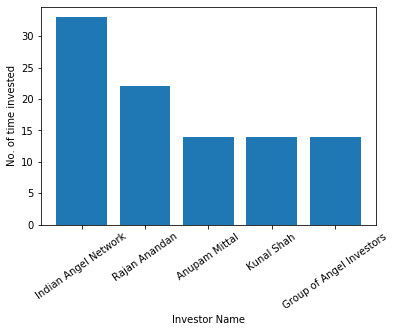

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with open("startup_funding.csv", encoding="utf8") as file:
    fileData = pd.read_csv(file)
    
    ########################################################
        #Correcting the names of the important startups#
    ########################################################
    
    fileData.StartupName.replace('Flipkart.com','Flipkart',inplace = True)
    fileData.StartupName.replace('Ola Cabs','Ola',inplace = True)
    fileData.StartupName.replace('Olacabs','Ola',inplace = True)
    fileData.StartupName.replace('Paytm Marketplace','Paytm',inplace=True)
    fileData.StartupName.replace('Oyo Rooms','Oyo',inplace=True)
    fileData.StartupName.replace('Oyorooms','Oyo',inplace=True)
    fileData.StartupName.replace('OyoRooms','Oyo',inplace=True)
    fileData.StartupName.replace('OYO Rooms','Oyo',inplace=True)
    
    ###############################################################
        #Handling the names of Investment Type and NaN Values#
    ###############################################################
    
    fileData.InvestmentType.fillna("Unknown", inplace = True)
    fileData.InvestmentType.replace("Crowd funding","Crowd Funding", inplace = True )
    fileData.InvestmentType.replace('PrivateEquity','Private Equity', inplace = True )
    fileData.InvestmentType.replace("SeedFunding","Seed Funding", inplace = True)
    
    ###### Handling  NaN values in Investor's Name #########
    
    fileData.InvestorsName.fillna("Unknown", inplace = True)
    
    #################################################################################
        #Creating Dictionary filtering to type of investment and stripping them#
    #################################################################################
    
    def createDict(start, inv, invType):
        d = {}
        for i in range(len(fileData["StartupName"])): #iterate through every row
            if(invType[i] == "Seed Funding" or invType[i] == "Crowd Funding"): #Checking if type is seed or crowd funding
                if(start[i] not in d):
                    d[start[i]] = set()
                    if("," not in inv[i]):
                        d[start[i]].add(inv[i].strip())
                    else:
                        string = inv[i].strip().split(",")
                        for j in string:
                            d[start[i]].add(j.strip())
                else:
                    d[start[i]].add(inv[i])
        return d
    
    dictionary = createDict(fileData["StartupName"], fileData["InvestorsName"], fileData["InvestmentType"])

    #########################################
        ##Building set of unique names##
    ########################################
    
    li = set() #Unique name list
    names = fileData.InvestorsName.unique()
    for i in names:
        if("," not in i):
            li.add(i.strip()) #Adding to set li, when single name is given
        else:
            s = i.strip().split(",") #Removing spaces(extra) and splitting on the basis of comma
            for j in s:
                li.add(j.strip())
    ###############################################################
            #Building dictionary for investor values#
    ##############################################################
    
    e = {} #dictionary for values            
    count = 0
    for i in li:
        for j in dictionary:
            if(i in dictionary[j]):
                count += 1
        e[i] = count
        count = 0
    e["Undisclosed Investors"] = -1
    e[""] = -1
    e["Undisclosed investors"] = -1
    e = {k: v for k, v in sorted(e.items(), key=lambda item: item[1], reverse = True)}
    
    ########################################
        #Extracting the final names#
    ########################################
    
    n = []
    l = []
    for i in e:
        n.append(i)
    for i in e.values():
        l.append(i)
    for i in range(5):
        print(n[i], "", l[i])
    x = n[0:5]
    y = l[0:5]
    plt.bar(x,y)
    plt.xlabel('Investor Name')
    plt.ylabel('No. of time invested')
    plt.xticks(rotation = 35)

**Justification:-**
As my friend's startup is in initial state so I have to find the number of investors whose investment type is Seed Funding and Crowd Funding type funding. So, I read the file and corrected the spelling mistakes of the Startup Names, Funding Types and handles NaN values. Then I filled NaN values in Investor type with Unknown to avoid errors I did this in order if I wanted to find the Unknowns in future I could have done with the same code. Instead of removing NaN. So Then created a function to make my code better, I terated through the dataframe filtering the Seed Funding and Crowd FUnding Investement type. Then I created a set in order to avoid the same names multiple times for a single startup. Then Created a set of startup names and splitted them when they were given with commas and then created a final dictionary where I calvulated the count of the investors investing in companies. I did this using Pandas and then plotted a bar graph using pyplot.